In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pycountry

import collections
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
manual_dict = {
    'BFA' : 'Africa', # Burkina Faso
    'BHS' : 'North America', # Bahamas
    'BRN' : 'Asia', # Brunei
    'CIV' : 'Africa', #Côte d'Ivoire
    'COD' : 'Africa', # DRC Congo
    'COG' : 'Africa', #Congo
    'CPV' : 'Africa', #Cabo Verde
    'CZE' : 'Europe', # Czechia
    'EGY' : 'Africa', # Egypt
    'FSM' : 'Oceania', # Micronesia
    'GMB' : 'Africa', # Gambia
    'HKG' : 'Asia', # Hong Kong
    'IRN' : 'Asia', # Iran
    'KGZ' : 'Asia', #Kyrgyzstan
    'KNA' : 'North America', # Kitts and Nevis
    'KOR' : 'Asia', # South Korea
    'LAO' : 'Asia', # Laos
    'LCA' : 'North America', # Saint Lucia
    'MAC' : 'Asia', # Macao
    'MKD' : 'Europe', # Macedonia
    'MMR' : 'Asia', # Myanmar
    'PSE' : 'Asia', # Palestine
    'SVK' : 'Europe', # Slovakia
    'SWZ' : 'Africa', # Eswatini
    'SXM' : 'North America', # Sint Maarten
    'TCA' : 'North America', # Turks and Caicos Islands
    'TLS' : 'Asia', # Timor
    'TUR' : 'Europe', # Turkey
    'USA' : 'North America', # USA
    'VCT' : 'North America', # Saint Vincent
    'VNM' : 'Asia', # Vietnam
    'YEM' : 'Africa', # Yemen
}

In [4]:
df_countries = (
    pd.read_csv('data/API_NY.GDP.MKTP.PP.CD_DS2_en_csv_v2_2261.csv',skiprows=4)
    .loc[:,['Country Name', 'Country Code']]
)

# Step 1: Load the country-continent mapping dataset
# You need to have a CSV file with 'country', 'alpha-3' (ISO 3166-1 alpha-3 code), and 'continent' columns
continent_df = pd.read_csv('data/Countries-Continents.csv')

# Merge the DataFrames on the country names
merged_df = continent_df.merge(df_countries, left_on='Country', right_on='Country Name', how='left')

# Convert the dataframe to a dictionary mapping ISO country codes to their respective continents
continent_mapping = dict(zip(merged_df['Country Code'], continent_df['Continent']))

# Add a new key-value pair
continent_mapping.update(manual_dict)

In [23]:
# Define colors for continents
continent_colors = {
    'Europe': '#56B4E9',
    'Asia': '#B76E79',
    'Africa': '#CC79A7',
    'North America': '#0072B2',
    'South America': '#009E73',
    'Oceania': '#E69F00'
}

#"#CC79A7",
#"#B76E79",
#"#D55E00",
#"#D3D3D3",
#"#009E73",
#"#0072B2",
#"#F0E442",
#"#FF7F50",
#"#56B4E9",
#"#98FFB9",
#"#E69F00",

In [6]:
df_gdp = pd.read_csv('data/API_NY.GDP.MKTP.PP.CD_DS2_en_csv_v2_2261.csv',skiprows=4)

In [7]:
df_gdp_cap =pd.read_csv('data/API_NY.GDP.PCAP.CD_DS2_en_csv_v2_128.csv',skiprows=4)

In [8]:
df_gdp_2023 = df_gdp.copy().rename(columns={'Country Code' : 'ISO_code'})

In [9]:
df_gdp_cap_2023 = df_gdp_cap.copy().rename(columns={'Country Code' : 'ISO_code'})

In [10]:
df_emi = pd.read_csv('data/GCB2022v27_MtCO2_flat.csv')

In [11]:
df_emi

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017,36096.739276,14506.973805,12242.627935,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018,36826.506600,14746.830688,12266.016285,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019,37082.558969,14725.978025,12345.653374,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020,35264.085734,14174.564010,11191.808551,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [12]:
result = collections.Counter(df_gdp_cap_2023.query("`2023` == `2023`").ISO_code.unique()) & collections.Counter(df_emi['ISO 3166-1 alpha-3'].unique())

intersected_list = list(result.elements())
intersected_list.remove('PRI')
intersected_list.remove('WLD')

In [28]:
df

<Axes: xlabel='2023', ylabel='cum_emi'>

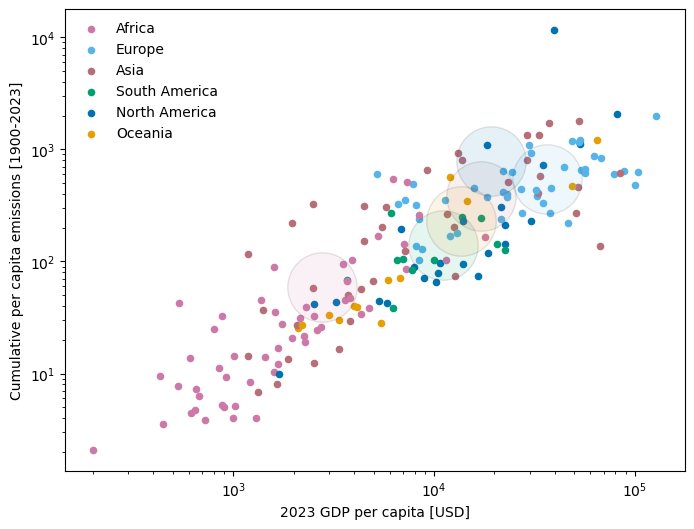

In [34]:
# Containers to compute averages
continent_data = {}

fig, ax = plt.subplots(figsize=(8,6))

for country in intersected_list:

    # Determine the continent of the country
    continent = continent_mapping.get(country, 'Unknown')
    color = continent_colors.get(continent, 'black')  # Fallback to 'black' if continent is 'Unknown'

    if continent == 'Unknown':
        print(country)
    
    cum_emi = (
        df_emi
        .rename(columns={'ISO 3166-1 alpha-3' : 'ISO_code', 'Per Capita' : 'per_capita'})
        .query("ISO_code == @country & Year > 1900")
        .set_index(['ISO_code'])
        .assign(cum_emi = lambda x : x.per_capita.cumsum())
        .iloc[-1,-1]
    )
    
    df = (
        df_gdp_cap_2023
        .loc[:,['ISO_code','2023']]
        .query("`2023` == `2023`") # Removes NaN values, because a NaN value is never equal to another NaN value. 
        .query("ISO_code == @country")
        .assign(cum_emi = cum_emi)
        .assign(emi_per_gdp = lambda x : x.cum_emi/x['2023']) 
        #.plot.scatter(x='2023',y='cum_emi', ax = ax,logx=True,logy=True,color=color,label=continent)
    )

    # Append country data to the continent's data
    if continent not in continent_data:
        continent_data[continent] = {"gdp_per_capita": [], "cum_emi": []}
    continent_data[continent]["gdp_per_capita"].append(df['2023'].values[0])
    continent_data[continent]["cum_emi"].append(cum_emi)

    # Scatter plot for each country
    df.plot.scatter(x='2023', y='cum_emi', ax=ax, logx=True, logy=True, color=color, label=continent)

# Calculate averages and plot them
for continent, data in continent_data.items():
    avg_gdp_per_capita = sum(data["gdp_per_capita"]) / len(data["gdp_per_capita"])
    avg_cum_emi = sum(data["cum_emi"]) / len(data["cum_emi"])
    color = continent_colors[continent]
    
    # Plot average point
    ax.scatter(avg_gdp_per_capita, avg_cum_emi, color=color, edgecolor='black', s=2500,alpha=0.1)

# Manage legend to group by continent instead of individual data points
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(),frameon=False)

ax.set_xlabel('2023 GDP per capita [USD]')
ax.set_ylabel('Cumulative per capita emissions [1900-2023]')
plt.savefig('figures/pc_emissions_GDP_pc.pdf',bbox_inches='tight')

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))

# Store all x and y values to fit the trend line later
all_x = []
all_y = []

for country in intersected_list:

    cum_emi = (
        df_emi
        .rename(columns={'ISO 3166-1 alpha-3': 'ISO_code', 'Per Capita': 'per_capita'})
        .query("ISO_code == @country & Year > 1800")
        .set_index(['ISO_code'])
        .assign(cum_emi=lambda x : x.per_capita.cumsum())
        .iloc[-1,-1]
    )
    
    data = (
        df_gdp_cap_2023
        .loc[:, ['ISO_code','2023']]
        .query("`2023` == `2023`")  # Removes NaN values
        .query("ISO_code == @country")
        .assign(cum_emi=cum_emi)
        .assign(emi_per_gdp=lambda x : x.cum_emi / x['2023'])
    )
    
    # Append the data to the lists
    #print(data['cum_emi'].values[0])
    #print(country)
    all_x.append(data['2023'].values[0])
    all_y.append(data['cum_emi'].values[0])
    
    data.plot.scatter(x='2023', y='cum_emi', ax=ax, logx=True, logy=True,legend=False)

# Convert lists to numpy arrays
all_x = np.array(all_x).reshape(-1, 1)
all_y = np.array(all_y).reshape(-1, 1)

# Perform linear regression (log-scale)
log_x = np.log10(all_x)
log_y = np.log10(all_y)
model = LinearRegression().fit(log_x, log_y)

# Generate line data
x_fit = np.linspace(min(log_x), max(log_x), 1000).reshape(-1, 1)
y_fit = model.predict(x_fit)

# Convert back to the original scale
x_fit_orig = 10**x_fit.flatten()
y_fit_orig = 10**y_fit.flatten()

# Plot the trend line
ax.plot(x_fit_orig, y_fit_orig, color='red', linestyle='--', linewidth=2)

# Set labels and title
ax.set_xlabel('GDP')
ax.set_ylabel('Cumulative per capita emissions [1800-2023]')
ax.legend(['Trend Line', 'Data Points'])

plt.show()